<a href="https://colab.research.google.com/github/itzdineshx/Internship_projects--DINESH-S-/blob/main/Task3_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection**


Credit card fraud detection refers to the set of policies, tools, methodologies, and practices used by credit card companies and financial institutions to prevent fraudulent purchases, both online and in-store.

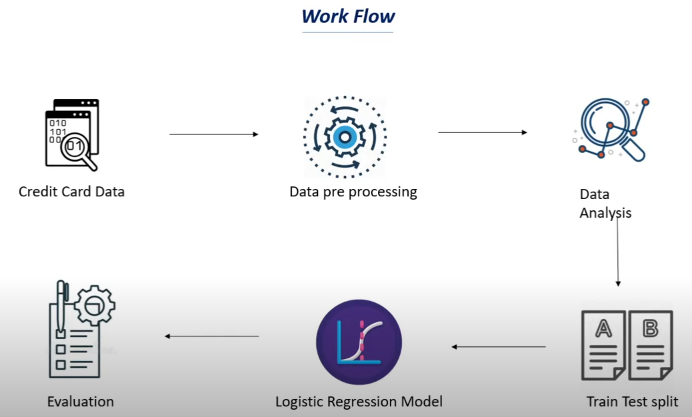

## ***Credit Card Data***

Uploading kaggle dataset by API

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
#fetching data through api
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 94% 62.0M/66.0M [00:02<00:00, 41.7MB/s]
100% 66.0M/66.0M [00:02<00:00, 31.2MB/s]


In [3]:
#extracting the data
from zipfile import ZipFile
file_name='/content/creditcardfraud.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')#when printed done the extracion is done

done


# **About Dataset**

### **Context**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### **Content**

*   The dataset contains transactions made by credit cards in September 2013 by European cardholders.
*   This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

*   
 The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



### ***Data Preprocessing***

In [38]:
#importing all needed libraries
import pandas as pd #for pre-processing data
import numpy as np #for numerical calculations
from sklearn.feature_extraction.text import TfidfVectorizer #for vectorization
from sklearn.model_selection import train_test_split #for splitting train and test the data
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.metrics import accuracy_score #for accuracy
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#accessing the data
credit_card_data = pd.read_csv('/content/creditcard.csv')

analysing the data

In [ ]:
credit_card_data.head()

In [14]:
credit_card_data.shape

(284807, 31)

In [16]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [17]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
#checking the null values
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [21]:
#analysing the distrubution
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


By the above analysis of distribution of classes is higly unbalanced as more than 99% of the data in the particular class.
so we can't train the model using this dataset.


*  0 -> legit Transaction

*  1 -> Fraudulent Transaction




In [22]:
#seperating the data for analysis
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data.Class==1]

In [23]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [24]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [25]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [27]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [28]:
#taking the same amount of legit data
legit_sample = legit.sample(n=492)

In [31]:
#creating the new of sample data
new_credit_dataset = pd.concat([legit_sample, fraud], axis=0)
new_credit_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
263651,161054.0,-0.966469,-0.114892,-0.001164,-0.552522,0.974950,-0.949012,0.677181,-0.064878,0.072970,...,-0.290940,-0.526735,0.743177,-0.382272,-0.343176,0.148763,0.022633,0.137629,4.99,0
22975,32527.0,0.648419,-1.805274,0.427480,-0.476142,-1.411376,0.105143,-0.547838,-0.061203,-0.589301,...,0.620664,1.002920,-0.453909,-0.180879,0.305474,-0.040598,-0.008523,0.085198,379.00,0
213388,139236.0,0.624982,-2.002274,0.072498,4.150779,-1.241616,1.412176,-0.481814,0.456724,-0.032852,...,0.617593,0.327404,-0.216590,0.707745,-0.798160,-0.142431,-0.086272,0.081833,609.60,0
176002,122589.0,1.953828,-0.500573,-0.349393,0.346223,-0.656943,-0.125538,-0.740161,0.129933,1.304928,...,0.219186,0.832885,0.073055,-0.323873,-0.100947,-0.211239,0.034359,-0.050696,9.99,0
187806,127700.0,2.034180,-0.574994,-0.659783,0.281505,-0.453027,-0.028604,-0.711109,0.048241,1.458023,...,0.091948,0.427548,0.034271,-0.966699,-0.175165,0.632209,-0.028232,-0.056618,23.00,0


In [34]:
new_credit_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [42]:
new_credit_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,86097.033537,-2.377244,1.795429,-3.513681,2.286650,-1.567391,-0.710045,-2.775254,0.247611,-1.275997,...,0.375640,-0.008716,-0.030815,-0.057814,0.026302,0.015146,0.085859,0.041937,109.192266,0.500000
std,47453.815174,5.521807,3.736466,6.215052,3.182956,4.228294,1.741031,5.864129,4.918011,2.320433,...,2.872429,1.188734,1.261857,0.567819,0.666740,0.465297,1.017315,0.437539,277.814122,0.500254
min,36.000000,-30.552380,-15.196543,-31.103685,-3.266470,-22.105532,-6.980170,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.032276,-4.781606,-1.196278,-7.263482,-2.305940,0.000000,0.000000
25%,44380.500000,-2.929666,-0.146906,-5.120349,-0.022507,-1.775001,-1.559879,-3.119040,-0.198771,-2.270235,...,-0.175563,-0.585394,-0.235247,-0.379574,-0.299347,-0.292909,-0.060180,-0.055708,1.630000,0.000000
50%,78397.500000,-0.678762,0.936702,-1.364740,1.334018,-0.414454,-0.628400,-0.587641,0.123062,-0.694979,...,0.138632,0.036561,-0.035523,0.005308,0.060362,-0.028412,0.050369,0.036002,17.990000,0.500000
75%,132703.250000,1.081567,2.873792,0.299482,4.202830,0.480580,0.054971,0.277872,0.860635,0.192993,...,0.652748,0.587394,0.197390,0.360319,0.395107,0.295260,0.433280,0.213371,99.990000,1.000000
max,170957.000000,2.279782,22.057729,2.672509,12.114672,11.095089,6.474115,5.802537,20.007208,5.427164,...,27.202839,8.361985,5.466230,3.104595,2.208209,2.745261,3.534541,2.102786,4008.360000,1.000000


## *Splitting the data*

In [45]:
x=new_credit_dataset.drop(columns='Class',axis=1)
y=new_credit_dataset['Class']
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
263651  161054.0 -0.966469 -0.114892 -0.001164 -0.552522  0.974950 -0.949012   
22975    32527.0  0.648419 -1.805274  0.427480 -0.476142 -1.411376  0.105143   
213388  139236.0  0.624982 -2.002274  0.072498  4.150779 -1.241616  1.412176   
176002  122589.0  1.953828 -0.500573 -0.349393  0.346223 -0.656943 -0.125538   
187806  127700.0  2.034180 -0.574994 -0.659783  0.281505 -0.453027 -0.028604   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [46]:
print(y)

263651    0
22975     0
213388    0
176002    0
187806    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [47]:
#split the data into train and test the data
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [48]:
print(x.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


##Train the model

### ***Logistic Regression model***

In [49]:
model = LogisticRegression()

In [51]:
#Training the data by logistic regression model
model.fit(X_train,Y_train)

LogisticRegression()

Accuracy score

In [53]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9212198221092758


In [54]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.8984771573604061


# **Evaluation:**



*   Accuracy on Training data :  0.9212198221092758
*   Accuracy score on Test Data :  0.8984771573604061

